### Solution for AD Slots by implementing multi armed bandit problem


Multi armed bandit problem is one of the type of reinforcement learning that enables in decision making at an uncertainity

In [155]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt

In [156]:
adslots=["top banner","sidebar","footer","pop-up"]
nslots=len(adslots)

#defining parameters
epsilon=0.1
n_impressions=1000
frequency=100 #change CTR after 100 impresions
amount=0.02 #maximum amount in CTR

#initialize sttistics
n_clicks=np.zeros(nslots)
n_impressions_per_slot=np.zeros(nslots)
estimatedctr=np.zeros(nslots)
ctr_history=[] #to store the Click through rates 
cumulative_ctr_history=[]


In [157]:
def update_click_probs(click_probs,amount):
    for i in range(nslots):
        change=np.random.uniform(-amount,amount)
        click_probs[i]=max(0,min(1,click_probs[i]+change))
    return click_probs

In [158]:
class EpsilonGreedyBandit:
    def __init__(self, num_ads, epsilon=0.1):
        self.num_ads=num_ads
        self.epsilon=epsilon
        self.counts=np.zeros(num_ads)#no of selections
        self.totalreward=np.zeros(num_ads)
    
    def select_ad(self):
        if np.random.rand()<self.epsilon:
            return np.random.randint(self.num_ads)
        else:
            return np.argmax(self.totalreward/(self.counts+1e-5))
        

    def update(self,index,reward):
         # Update the counts and rewards for the selected ad
        self.counts[index]+=1
        self.totalreward[index]+=reward
    
    def averageCTR(self):
        #returns the estimated CTR for each ad
        return self.totalreward/(self.counts+1e+5)
    
    


The epsilon-greedy algorithm is a strategy for balancing exploration and exploitation in the multi-armed bandit problem


Exploration allows an agent to improve its current knowledge about each action, hopefully leading to long-term benefit. Improving the accuracy of the estimated action-values, enables an agent to make more informed decisions in the future.

Exploitation on the other hand, chooses the greedy action to get the most reward by exploiting the agent’s current action-value estimates. But by being greedy with respect to action-value estimates, may not actually get the most reward and lead to sub-optimal behaviour.

In [159]:
#initializing Click probabilities
click_probs=np.random.uniform(0,1,nslots)
print("Initial click probabilities",click_probs)

Initial click probabilities [0.16638359 0.7932716  0.57068926 0.48143487]


In [170]:
# Simulate the process
def runsimulator(num_ads=4, n_impressions=1000, epsilon=0.1, frequency=100, amount=0.02):
    bandit = EpsilonGreedyBandit(num_ads, epsilon)
    # Generate random initial Click-through rates (CTR)
    truectr = np.random.uniform(0, 1, num_ads)
    print("Initial true CTR values for each ad slot:", truectr)
    
    total_clicks = 0
    ctr_over_time = []
    cumulative_ctr_history = []
    
    # Simulate ad impressions
    for i in range(n_impressions):
        # Select an ad slot using epsilon-greedy strategy
        chosen_slot = bandit.select_ad()

        # Simulate user response (click or no click) based on the true CTR
        reward = np.random.rand() < truectr[chosen_slot]
        total_clicks += reward
        
        # Update the bandit knowledge based on the observed reward
        bandit.update(chosen_slot, reward)
        
        # Calculate cumulative CTR
        cumulative_ctr = total_clicks / (i + 1)
        cumulative_ctr_history.append(cumulative_ctr)

        # Update CTR over time for plotting
        ctr_over_time.append(bandit.averageCTR().copy())

        # Update true CTR values at change_frequency intervals
        if i % frequency == 0 and i > 0:
            truectr = update_click_probs(truectr, amount)
            print(f"True CTR values updated after {i} impressions:", truectr)
    
    return cumulative_ctr_history, ctr_over_time, bandit


Initial true CTR values for each ad slot: [0.77157472 0.15559814 0.44963282 0.61957966]
True CTR values updated after 100 impressions: [0.76517541 0.13627333 0.45571583 0.60003784]
True CTR values updated after 200 impressions: [0.76400335 0.13959559 0.44725983 0.59449976]
True CTR values updated after 300 impressions: [0.76172901 0.14360246 0.45808864 0.57904615]
True CTR values updated after 400 impressions: [0.74285676 0.15941001 0.45088891 0.58740168]
True CTR values updated after 500 impressions: [0.73175262 0.15148702 0.46299268 0.56927462]
True CTR values updated after 600 impressions: [0.73328615 0.15524669 0.46347091 0.58605701]
True CTR values updated after 700 impressions: [0.73977779 0.14024247 0.46490943 0.57007497]
True CTR values updated after 800 impressions: [0.73515256 0.15419364 0.47705446 0.56106054]
True CTR values updated after 900 impressions: [0.75003518 0.14899057 0.46846366 0.55261947]


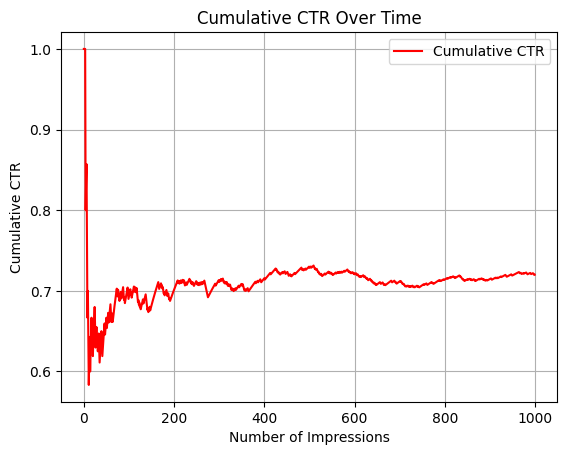

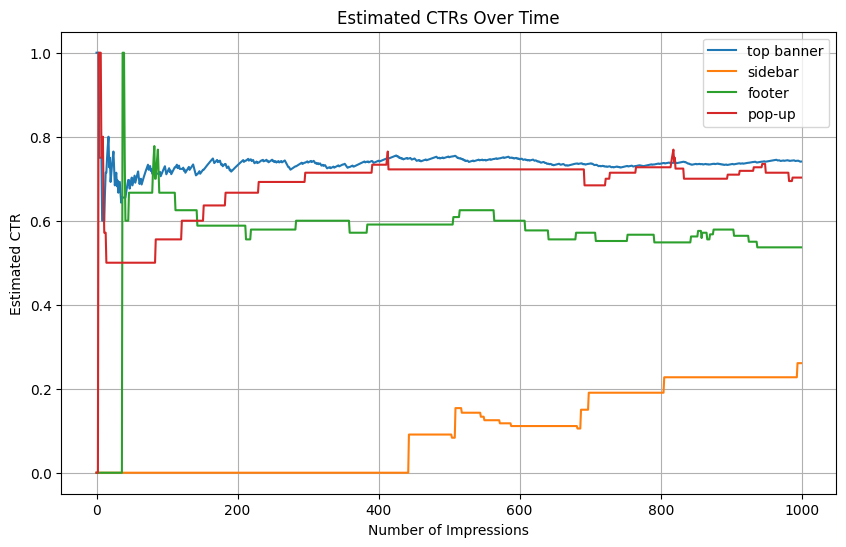

In [174]:
# Run the simulation
num_ads = 4
n_impressions = 1000
epsilon = 0.1

cumulative_ctr_history, ctr_over_time, bandit = runsimulator(num_ads, n_impressions, epsilon)

# Convert ctr_over_time to a numpy array for easier plotting
ctr_over_time = np.array(ctr_over_time)


# Plotting the cumulative CTR over time
plt.plot(cumulative_ctr_history, label="Cumulative CTR", color='red')
plt.title('Cumulative CTR Over Time')
plt.xlabel('Number of Impressions')
plt.ylabel('Cumulative CTR')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the estimated CTR for each ad slot over time
plt.figure(figsize=(10, 6))
for slot in range(nslots):
    plt.plot(ctr_over_time[:, slot], label=f'{adslots[slot]}')

plt.title('Estimated CTRs Over Time')
plt.xlabel('Number of Impressions')
plt.ylabel('Estimated CTR')
plt.legend()
plt.grid(True)
plt.show()

here to conclude we see that over real time ad slots the num of click rate probability change over time  and also from the above plotting we see that for each ad slots its increasing at the initial stage except for side bar but if we run the simultation the click rattes get updated and also from the above we see that top banner ads and popup at some point is effective based on the click as well as customer reviews